In [ ]:
import os

In [ ]:
# On récupère le dossier qui contient nos datasets
data_dir = 'chest_Xray'

In [ ]:
os.listdir(data_dir)

In [4]:
# On importe nos différentes dépendences
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Va nous permettre de lire directement un fichier image
from matplotlib.image import imread

In [6]:
# On récupère le chemin pour les data de test
test_path = data_dir + '/test'

# Puis le chemin pour les data d'entrainement
train_path = data_dir + '/train'

Text(0.5, 0.98, 'Distribution of each class in train dataset')

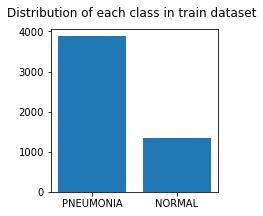

In [7]:
# Ici on va visualiser la distribution des images par label/classe

# Les labels de mon dataset
labels = os.listdir(train_path)
# Je vais récupérer le nombre d'image par label dans le dataset d'entrainement
values = []

for label in labels:
    value = len(os.listdir(train_path + '/' + label + '/'))
    values.append(value)

fig, ax1 = plt.subplots(1, 1, figsize=(3, 3))
ax1.bar(labels, values)
fig.suptitle('Distribution of each class in train dataset')

In [8]:
# Je récupère le chemin de l'image d'un poumon infécté
pneumonia_x_ray = train_path + '/PNEUMONIA/' + os.listdir(train_path + '/PNEUMONIA')[0]

In [9]:
# On va convertir notre image en un tableau numpy
imread(pneumonia_x_ray)

array([[210, 208, 206, ..., 213, 215, 216],
       [210, 208, 206, ..., 213, 216, 217],
       [210, 208, 205, ..., 213, 216, 218],
       ...,
       [ 16,  15,  14, ...,  47,  47,  47],
       [ 16,  15,  14, ...,  46,  46,  46],
       [ 16,  15,  14, ...,  46,  46,  46]], dtype=uint8)

In [10]:
# On va checker la shape du tableau crée à partir de la radio des poumons
imread(pneumonia_x_ray).shape

(736, 1048)

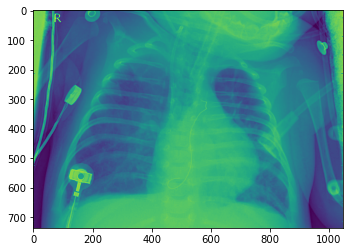

In [11]:
# On va visualiser l'image de la radio des poumons
plt.imshow(imread(pneumonia_x_ray))

In [12]:
# On récupère la première image du dataset d'entrainement pour les poumons normaux (sains)
normal_x_ray = train_path + '/NORMAL/' + os.listdir(train_path + '/NORMAL')[0]

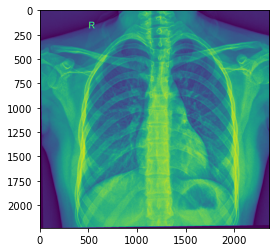

In [13]:
# On peut visualiser la radio pour les poumons infectés par la pneumonie
plt.imshow(imread(normal_x_ray))

In [14]:
# On va checker combien d'image contient notre dataset d'entrainement pour les poumons infectés

len(os.listdir(train_path + '/PNEUMONIA'))

3875

In [15]:
# Et pour les poumons normaux ?
len(os.listdir(train_path + '/NORMAL'))

1341

In [16]:
# Chaque image est transformé en tableau de format d1*d2, e.g: pour la 1ère image de train => (736, 1048)
# Pour entrainer correctement notre CNN correctement, nous avons besoin de l'entrainer sur des images relativement de la
# même taille. Les dimensions d'images doivent donc être le moins disparâtre possible. 
# Pour se faire nous allons essayer de visualiser ces données.

# Dans un premier temps nous allons récupéré les dimensions pour chaque image d'un dataset (train) et les stocker
dim1 = []
dim2 = []
test = 'Hello World'

# On va ensuite itérer la liste des fichier (images) de notre dataset d'entainement (normaux) pour récupérer le chemin de chaque image 
for x_ray_filename in os.listdir(train_path + '/NORMAL'):
    img = imread(train_path + '/NORMAL/' + x_ray_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

/Users/younessbennaj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


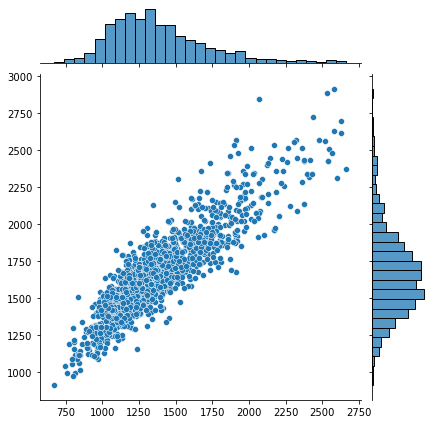

In [17]:
sns.jointplot(dim1, dim2)

In [18]:
# On fait une première moyenne des dimesions dans dim1
np.mean(dim1)

1381.4310216256524

In [19]:
# Puis dans dim2
np.mean(dim2)

1667.7345264727815

In [20]:
# Voici donc la shape à partir de laquelle je vais redimenssioner mes images
image_shape = (1380, 1668)

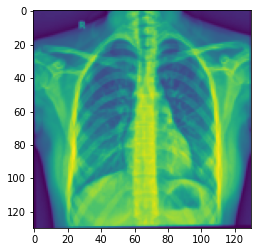

In [21]:
# Redimensionner une image (normal)
from skimage import transform

# On défini la nouvelle shape de notre image
new_shape = (130, 130)

normal_x_ray_resize = transform.resize(imread(normal_x_ray), new_shape)

# On peut maintenant visualiser mon image redimensionnée 
plt.imshow(normal_x_ray_resize)

(130, 130)


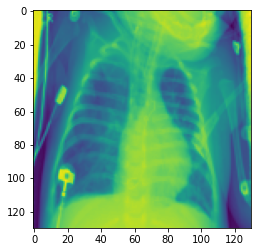

In [22]:
# Redimensionner une image (infectée)
from skimage import transform

# On défini la nouvelle shape de notre image
new_shape = (130, 130)

pneumonia_x_ray_resize = transform.resize(imread(pneumonia_x_ray), new_shape)

print(pneumonia_x_ray_resize.shape)

# On peut maintenant visualiser mon image redimensionnée 
plt.imshow(pneumonia_x_ray_resize)

In [23]:
# Je peux maitenant redimensionner mon dataset d'entrainement pour les poumons sains
#train_data_normal_resized = []

# On défini la nouvelle shape de notre image
#new_shape = (130, 130)

#for x_ray_filename in os.listdir(train_path + '/NORMAL'):
    # image sous la forme d'un numpy array
    #img = imread(train_path + '/NORMAL/' + x_ray_filename)
    # on redimmensionne avec img_resized en fonction de la shape voulue
    #img_resized = transform.resize(img, new_shape)
    #train_data_normal_resized.append(img_resized)
    
# ... trop long !

In [33]:
# Meilleure solution
from keras_preprocessing.image import ImageDataGenerator

# On peut créer une fonction pour réutiliser la logique pour chaque generator (test, train, ...)

def get_dataset_gen(dataset_name, new_shape):
    # /!\On a besoin de créer une instance de la classe ImageDataGenerator avant de pouvoir utiliser flow_from_directory()
    core_idg = ImageDataGenerator()
    
    # Pour obtenir le chemin du dossier courrant
    dirname = os.path.abspath('')

    # string qui représente le chemin vers le dossier qui contient notre dataset (ex: train dataset)
    directory_path = os.path.join(dirname, 'chest_Xray/' + dataset_name) 

    # On va convertir nos images en greyscale pour obtenir 1 seul canal de couleur
    color = 'grayscale'

    # classes: On va laisser à None et utiliser les classes correspondant aux sous dossiers (NORMAL/PNEUMONIA)

    # Ici on va selectionner binary car on est dans le cas où on a seulement deux catégories (NORMAL/PNEUMONIA)
    class_mode = 'binary'

    # Le dossier dans lequel on va sauvegarder nos images augmentées/normalisées
    new_images_dir = os.path.abspath('') + '/chest_Xray_resized/train'
    new_image_dir_prefix = 'resized'
    subset = 'training'
    
    
    
    dataset_gen = core_idg.flow_from_directory(
        directory=directory_path,
        target_size=new_shape,
        color_mode=class_mode,
        classes=None,
        class_mode="categorical",
        batch_size=32,
        shuffle=True,
        seed=None,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        follow_links=False,
        subset=None,
        interpolation="nearest",
    )
    return dataset_gen

train_gen = get_dataset_gen('train', (130, 130))
test_gen = get_dataset_gen('test', (130, 130))



/Users/younessbennaj/epitech/T-DEV-810/project/chest_Xray_resized/train
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


(130, 130, 1)


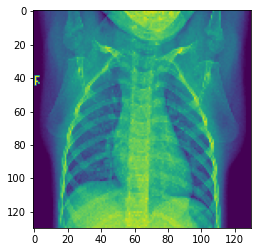

In [36]:
# On va maintenant visualiser
# Les labels de mon dataset
labels = os.listdir(train_path)

t_x, t_y = next(train_gen)
# La nouvelle shape des mes échantillons: (130, 130, 1)
print(t_x[0].shape)
plt.imshow(t_x[8])

In [43]:
# On importe les dépendances dont on va avoir besoin pour créer notre model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [45]:
# On va créer notre model 
model = Sequential()

# Couche 1
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(130, 130, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # On ajoute notre couche de pooling

# On ajoute 2 autres couchess convolutives, plus les images sont grandes et complexes et plus il faudra en ajouter

# Couche 2
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(130, 130, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # On ajoute notre couche de pooling

# Couche 3
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(130, 130, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # On ajoute notre couche de pooling

# On applati les données
model.add(Flatten())

# On ajoute la couche dense
model.add(Dense(128, activation='relu'))

# On ajoute un dropout pour éviter l'overfitting
model.add(Dropout(0.5))

# Sigmoid => nous sommes dans un problème de classification binaire (Normal/Infecté)
model.add(Dense(1, activation='sigmoid'))

# Pour l'instant on veut seulement suivre la metrique d'accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [46]:
# On peut voir les différentes couches et différents paramètres par couche
# couche dense => 1605760 (bcp de temps à entrainer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [50]:
batch_size=32